# EDA & Modelling

## Package loading

In [1]:
from EZS_deps.EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


2022-06-28 11:06:09.572300: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 11:06:09.572328: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Exploratory Data Analysis 

### File and parameters loading

In [104]:
problem_type = 'classification'

In [105]:
stacking = 'True'

In [106]:
data_size = 'large'

In [107]:
df = pd.read_csv('/home/phbillet/Documents/python project/EZStacking-main/dataset/Dry_Bean_Dataset.csv')

In [108]:
target_col = 'Class'

#### Thresholds

In [109]:
threshold_NaN = 0.5

In [110]:
threshold_cat = 5

In [111]:
threshold_Z = 3.0

In [112]:
test_size = 0.33

In [113]:
threshold_entropy = 0.75

In [114]:
threshold_corr = 0.95

In [115]:
threshold_model = 5

In [116]:
threshold_score = 0.7

In [117]:
threshold_feature = 5

#### Drop user's columns:

In [118]:
user_drop_cols = ['Compactness', 'ConvexArea', 'EquivDiameter', 'Extent', 'MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'ShapeFactor1', 'ShapeFactor3', 'ShapeFactor4', 'Solidity', 'roundness']

Dataset before deletion

In [119]:
display(df)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

In [120]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [121]:
display(df)

Area  AspectRation  Eccentricity  ShapeFactor2     Class
0      28395      1.197191      0.549812      0.003147     SEKER
1      28734      1.097356      0.411785      0.003564     SEKER
2      29380      1.209713      0.562727      0.003048     SEKER
3      30008      1.153638      0.498616      0.003215     SEKER
4      30140      1.060798      0.333680      0.003665     SEKER
...      ...           ...           ...           ...       ...
13606  42097      1.552728      0.765002      0.001749  DERMASON
13607  42101      1.476439      0.735702      0.001886  DERMASON
13608  42139      1.472582      0.734065      0.001888  DERMASON
13609  42147      1.489326      0.741055      0.001852  DERMASON
13610  42159      1.619841      0.786693      0.001640  DERMASON

[13611 rows x 5 columns]

#### Dataset copy

In [122]:
df_copy = df.copy()

### Dataset Information

In [123]:
df.shape

(13611, 5)

#### Some records

In [124]:
display(df)

Area  AspectRation  Eccentricity  ShapeFactor2     Class
0      28395      1.197191      0.549812      0.003147     SEKER
1      28734      1.097356      0.411785      0.003564     SEKER
2      29380      1.209713      0.562727      0.003048     SEKER
3      30008      1.153638      0.498616      0.003215     SEKER
4      30140      1.060798      0.333680      0.003665     SEKER
...      ...           ...           ...           ...       ...
13606  42097      1.552728      0.765002      0.001749  DERMASON
13607  42101      1.476439      0.735702      0.001886  DERMASON
13608  42139      1.472582      0.734065      0.001888  DERMASON
13609  42147      1.489326      0.741055      0.001852  DERMASON
13610  42159      1.619841      0.786693      0.001640  DERMASON

[13611 rows x 5 columns]

#### Dataframe structure

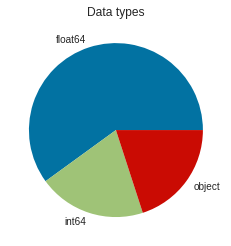

In [125]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [126]:
display(df.describe().T)

count          mean           std           min           25%  \
Area          13611.0  53048.284549  29324.095717  20420.000000  36328.000000   
AspectRation  13611.0      1.583242      0.246678      1.024868      1.432307   
Eccentricity  13611.0      0.750895      0.092002      0.218951      0.715928   
ShapeFactor2  13611.0      0.001716      0.000596      0.000564      0.001154   

                       50%           75%            max  
Area          44652.000000  61332.000000  254616.000000  
AspectRation      1.551124      1.707109       2.430306  
Eccentricity      0.764441      0.810466       0.911423  
ShapeFactor2      0.001694      0.002170       0.003665

#### Which columns could be categorical ?

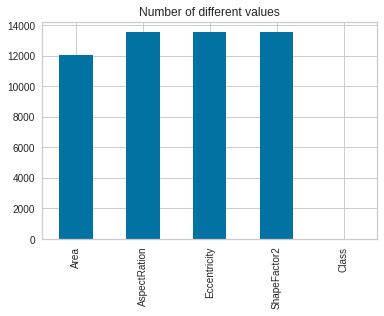

In [127]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [128]:
duplicates(df)

Number of rows before removing: 13611
Number of duplicate rows: 68
Number of rows after removing: 13543


Area  AspectRation  Eccentricity  ShapeFactor2     Class
0      28395      1.197191      0.549812      0.003147     SEKER
1      28734      1.097356      0.411785      0.003564     SEKER
2      29380      1.209713      0.562727      0.003048     SEKER
3      30008      1.153638      0.498616      0.003215     SEKER
4      30140      1.060798      0.333680      0.003665     SEKER
...      ...           ...           ...           ...       ...
13606  42097      1.552728      0.765002      0.001749  DERMASON
13607  42101      1.476439      0.735702      0.001886  DERMASON
13608  42139      1.472582      0.734065      0.001888  DERMASON
13609  42147      1.489326      0.741055      0.001852  DERMASON
13610  42159      1.619841      0.786693      0.001640  DERMASON

[13543 rows x 5 columns]

#### Drop NaN:

In [129]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [130]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [131]:
display(dropped_cols)

array(['Compactness', 'ConvexArea', 'EquivDiameter', 'Extent',
       'MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'ShapeFactor1',
       'ShapeFactor3', 'ShapeFactor4', 'Solidity', 'roundness'],
      dtype='<U32')

#### Encoding data:

In [132]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: Area
Encoding numeric column: AspectRation
Encoding numeric column: Eccentricity
Encoding numeric column: ShapeFactor2
Encoding object column: Class


#### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


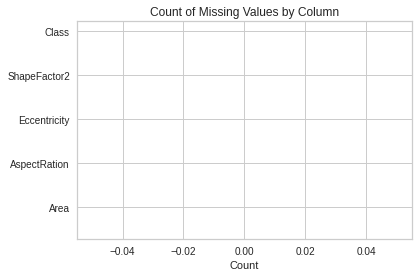

In [133]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [134]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [135]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.52MB
Memory usage after optimization is: 0.12MB
Decreased by 77.5%


##### Dataframe structure after compression

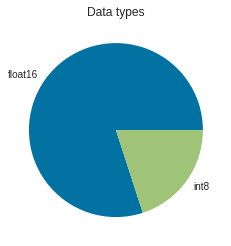

In [136]:
plot_dataframe_structure(df)

#### Outliers:

In [137]:
df = outliers(df, threshold_Z)

Using Z_score,  623  rows will be suppressed.


### Plottings

#### Ranking 

##### Ranking 1D 

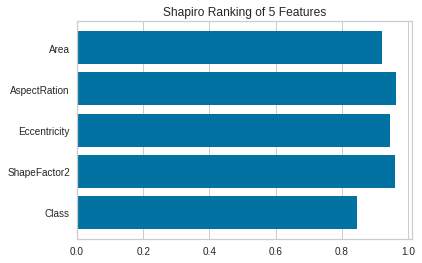

In [138]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

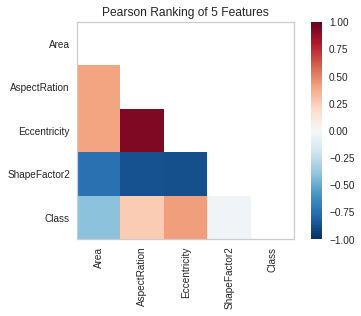

In [139]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

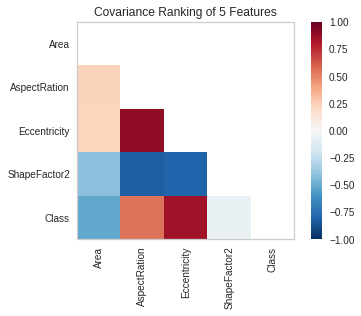

In [140]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

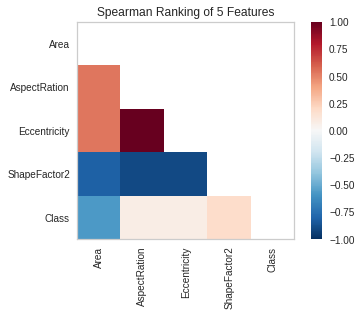

In [141]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

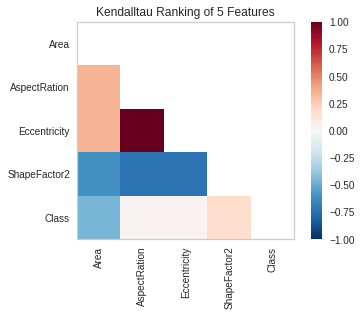

In [142]:
rank2d(df, algorithm='kendalltau');

#### Correlation

In [143]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [144]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

##### Splitting dataframe in features and targets

In [145]:
y = df[target_col]

In [146]:
X = df.drop(target_col, axis=1)

###### Correlation with Yellow Bricks

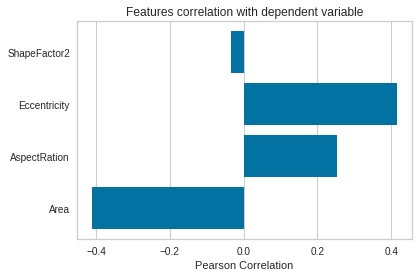

In [147]:
feature_correlation(X, y);

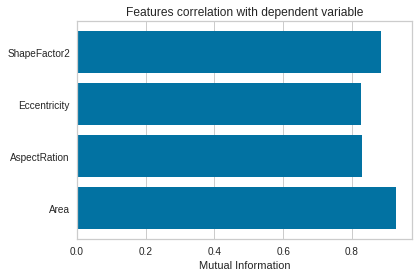

In [148]:
feature_correlation(X, y, method='mutual_info-classification');

#### Feature importance (a priori)

##### According to logistic regression

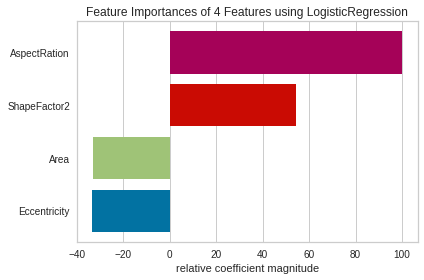

In [149]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

#### PCA

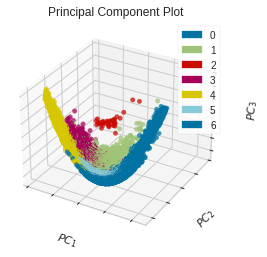

In [150]:
pca_decomposition(X, y.astype(int), projection=3);

#### Class balancing

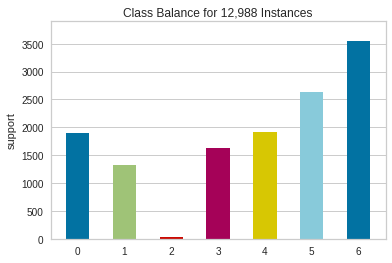

Entropy =  0.9003515630520563


In [151]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

#### Check columns that should be dropped

In [152]:
print(dropped_cols)

[]


## Splittings 

In [153]:
df = df_copy

#### Splitting dataframe in features and targets

In [154]:
y = df[target_col]

In [155]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [156]:
nb_features = len(X.columns.tolist())

In [157]:
nb_targets = len(y.unique())

In [158]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [159]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy)

##### Encoding

In [160]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [161]:
cat_selector = make_column_selector(dtype_include=object)

In [162]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [163]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [164]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True))

In [165]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

##### For models not based on tree

In [166]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

In [167]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler())

In [168]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

##### Keras neural network definition

In [169]:
def K_Class(): 
    keras.backend.clear_session() 
#   neural network architecture: start 
    model = Sequential() 
    model.add(Dense(10 * layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.5)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(nb_targets, activation='softmax')) 
#   neural network architecture: end   
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


##### Early Stopping

In [170]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20)

In [171]:
K_C = KerasClassifier(K_Class, batch_size=64, epochs=2000, callbacks=[es], validation_split=0.1, verbose=1) 
K_C._estimator_type = 'classifier'

##### Level-0 models

In [172]:
level_0 = [ 
          ('RFCG', make_pipeline(ntree_preprocessor, RandomForestClassifier(criterion='gini', n_estimators=50))), 
          ('RFCE', make_pipeline(ntree_preprocessor, RandomForestClassifier(criterion='entropy', n_estimators=50))), 
          ('ABC', make_pipeline(ntree_preprocessor, AdaBoostClassifier())), 
          ('HGBC', make_pipeline(ntree_preprocessor, HistGradientBoostingClassifier(early_stopping=True))), 
          ('SGDCH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='hinge', penalty='elasticnet'))), 
          ('SGDCLL', make_pipeline(ntree_preprocessor, SGDClassifier(loss='log_loss', penalty='elasticnet'))), 
          ('SGDCMH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='modified_huber', penalty='elasticnet'))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2'))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.15))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2'))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2'))), 
          ('SVCL', make_pipeline(ntree_preprocessor, SVC(kernel='linear'))), 
          ('SVCP', make_pipeline(ntree_preprocessor, SVC(kernel='poly'))), 
          ('SVCG', make_pipeline(ntree_preprocessor, SVC(kernel='rbf'))), 
          ('SVCS', make_pipeline(ntree_preprocessor, SVC(kernel='sigmoid'))), 
          ('KERC', make_pipeline(ntree_preprocessor, K_C)), 
          ]

##### Level-1 model

In [173]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], n_jobs=-1)

##### Stacking for classification

In [174]:
model = StackingClassifier(level_0, final_estimator=level_1)

### Model fitting

In [175]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

Epoch 1/2000
129/129 [==============================] - 2s 6ms/step - loss: 1.4898 - accuracy: 0.4620 - val_loss: 1.4201 - val_accuracy: 0.4660
Epoch 2/2000
129/129 [==============================] - 0s 4ms/step - loss: 0.8756 - accuracy: 0.6970 - val_loss: 1.0296 - val_accuracy: 0.6447
Epoch 3/2000
129/129 [==============================] - 1s 4ms/step - loss: 0.7316 - accuracy: 0.7473 - val_loss: 0.6602 - val_accuracy: 0.8421
Epoch 4/2000
129/129 [==============================] - 1s 5ms/step - loss: 0.6500 - accuracy: 0.7735 - val_loss: 0.4416 - val_accuracy: 0.8827
Epoch 5/2000
129/129 [==============================] - 0s 4ms/step - loss: 0.6170 - accuracy: 0.7891 - val_loss: 0.3744 - val_accuracy: 0.8860
Epoch 6/2000
129/129 [==============================] - 0s 4ms/step - loss: 0.5718 - accuracy: 0.8024 - val_loss: 0.3484 - val_accuracy: 0.8904
Epoch 7/2000
129/129 [==============================] - 1s 5ms/step - loss: 0.5520 - accuracy: 0.8048 - val_loss: 0.3379 - val_accuracy:

StackingClassifier(estimators=[('RFCG',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    SimpleImputer(add_indicator=True)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f73469b35b0>),
                                                                                                  ('pipeline-2...
                                                                                                                                  sparse=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f73469b3340>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('kerasclassifier',
                                                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f73469b02e0>)]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        n_jobs=-1,
                                                        penalty='elasticnet',
                                                        solver='saga'))

### Model evaluation

#### Model scoring

141/141 [==============================] - 0s 2ms/step


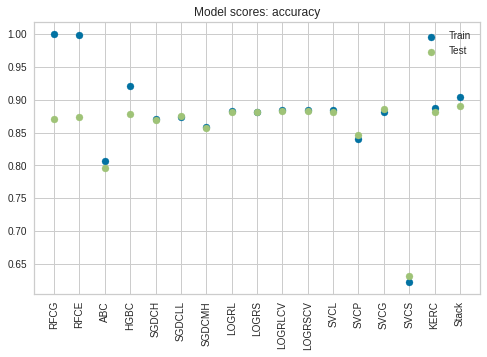

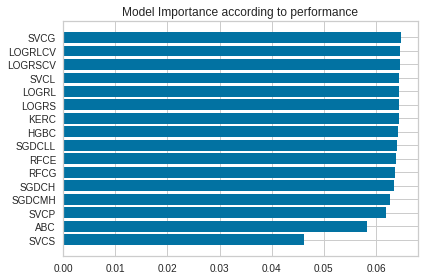

In [176]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

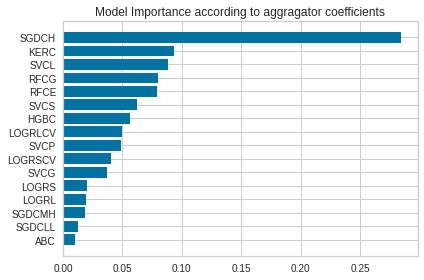

In [177]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

141/141 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://7d2bfcf5-83b4-4e88-8c07-6d1cc52c4fcb/assets
INFO:tensorflow:Assets written to: ram://49bd6f35-03dc-4b15-a6f1-7ad4439a5909/assets


2022-06-28 12:45:19.398780: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 12:45:19.398809: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


INFO:tensorflow:Assets written to: ram://6a0674c1-e674-496c-9a46-d826b14d7c5c/assets


2022-06-28 12:45:22.500532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 12:45:22.500684: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 12:45:22.500725: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 12:45:22.501105: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-28 12:45:22.638753: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load 

INFO:tensorflow:Assets written to: ram://519f089d-1c8b-4357-8761-b6d755e9137e/assets


2022-06-28 12:45:24.790224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 12:45:24.790417: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-28 12:45:26.008154: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 12:45:26.008222: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 12:45:26.008285: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 12:45:26.009149: I tensorflow/core/platform/cpu_fe

141/141 [==============================] - 1s 3ms/step


2022-06-28 12:45:31.364903: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 12:45:31.364949: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 12:45:31.364979: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 12:45:31.365339: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


141/141 [==============================] - 0s 1ms/step


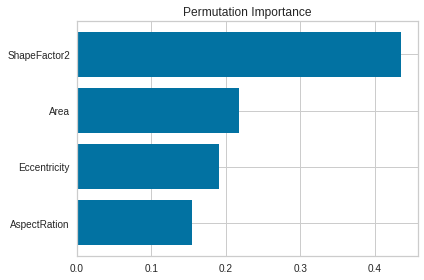

array([['AspectRation', 0.1552193496230057],
       ['Eccentricity', 0.19070795730147994],
       ['Area', 0.2181617198198347],
       ['ShapeFactor2', 0.4359109732556797]], dtype=object)

In [178]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [179]:
features_of_interest = ['ShapeFactor1', 'AspectRation', 'Area']

INFO:tensorflow:Assets written to: ram://7851bbc3-337f-4740-b46e-add7f18b89d5/assets
INFO:tensorflow:Assets written to: ram://5c67482f-dfd3-4e3f-b08c-2a3818523a02/assets
285/285 [==============================] - 0s 1ms/step


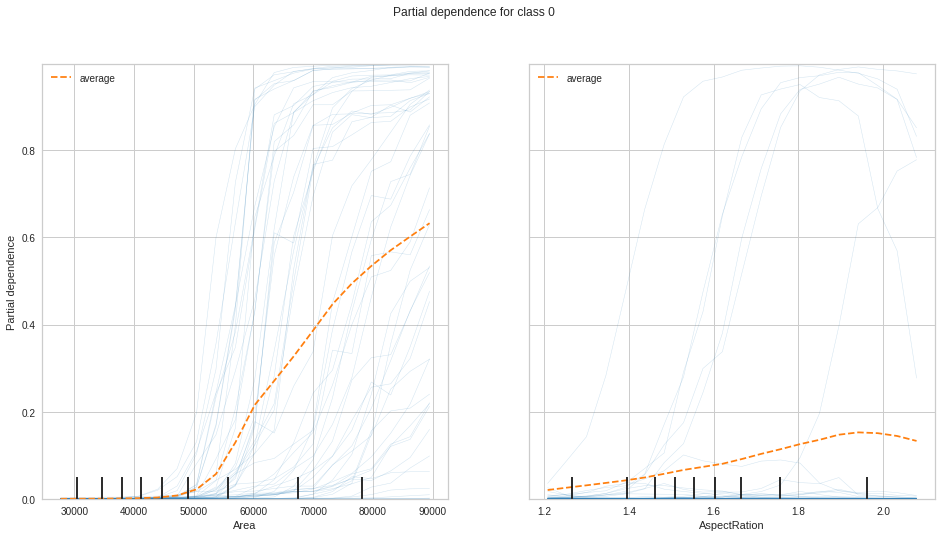

INFO:tensorflow:Assets written to: ram://c596c8e9-1080-45a5-a96c-f8ff68ad0bd2/assets
INFO:tensorflow:Assets written to: ram://a9ac3686-82b0-4faa-944f-2282e7e7d5b1/assets
285/285 [==============================] - 0s 1ms/step


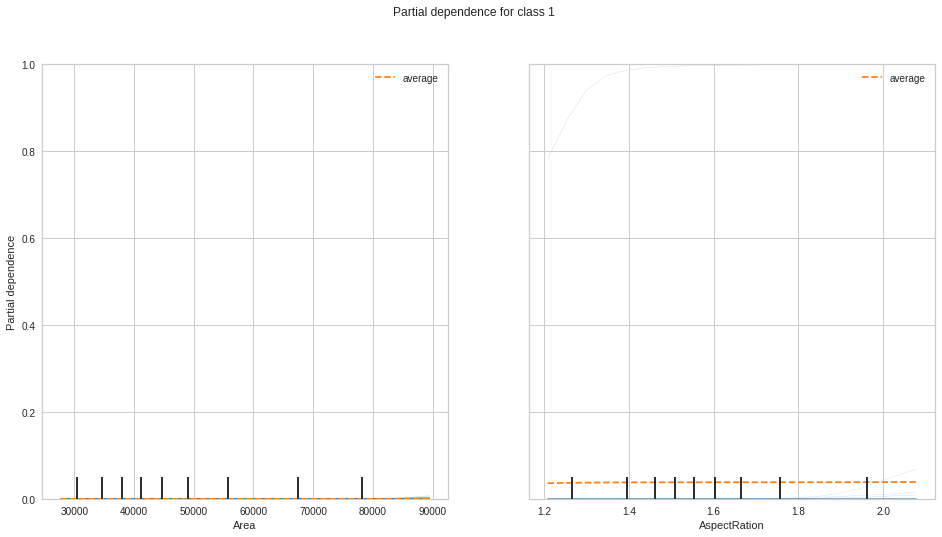

INFO:tensorflow:Assets written to: ram://44f10f0d-873a-4314-838e-7e2c2077325b/assets
INFO:tensorflow:Assets written to: ram://f5acd18c-5a70-4161-9f52-4a7f08a0b2d8/assets
285/285 [==============================] - 0s 1ms/step


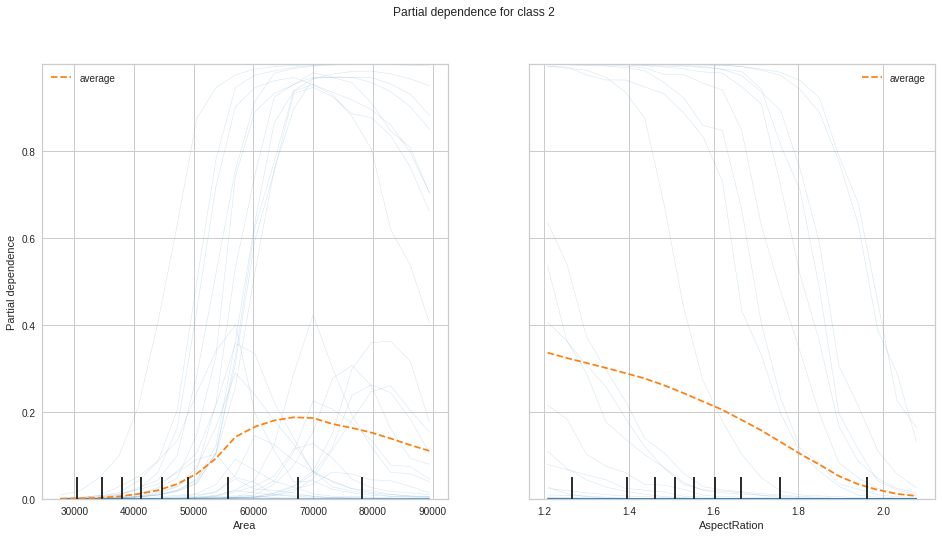

INFO:tensorflow:Assets written to: ram://977cfba9-c417-446e-996c-c06e05c6f660/assets
INFO:tensorflow:Assets written to: ram://a6ac8045-7310-4e1a-b147-fccbdee84ff3/assets
285/285 [==============================] - 0s 1ms/step


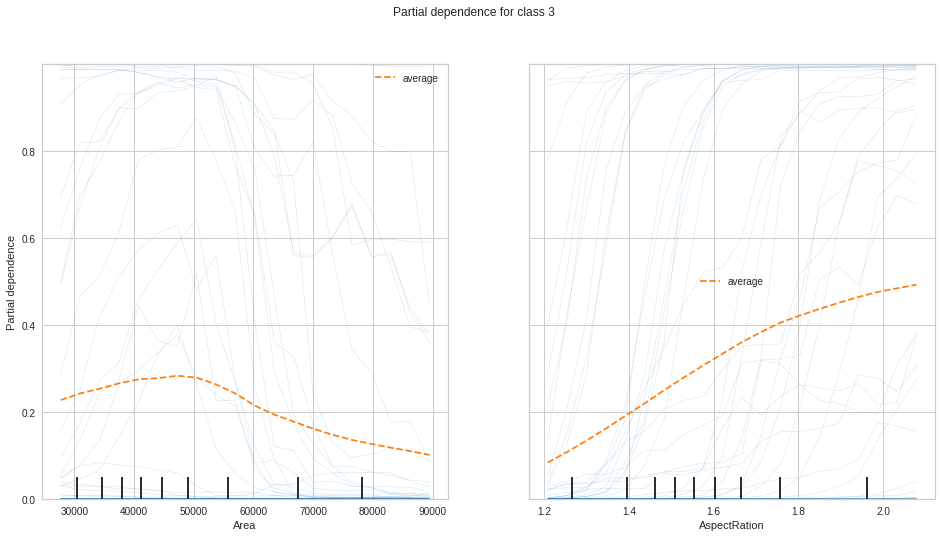

INFO:tensorflow:Assets written to: ram://c99354c9-24be-45af-943a-2ca9d814c970/assets
INFO:tensorflow:Assets written to: ram://dc5ef345-2d5f-42c3-b831-483e6241fb84/assets
285/285 [==============================] - 0s 1ms/step


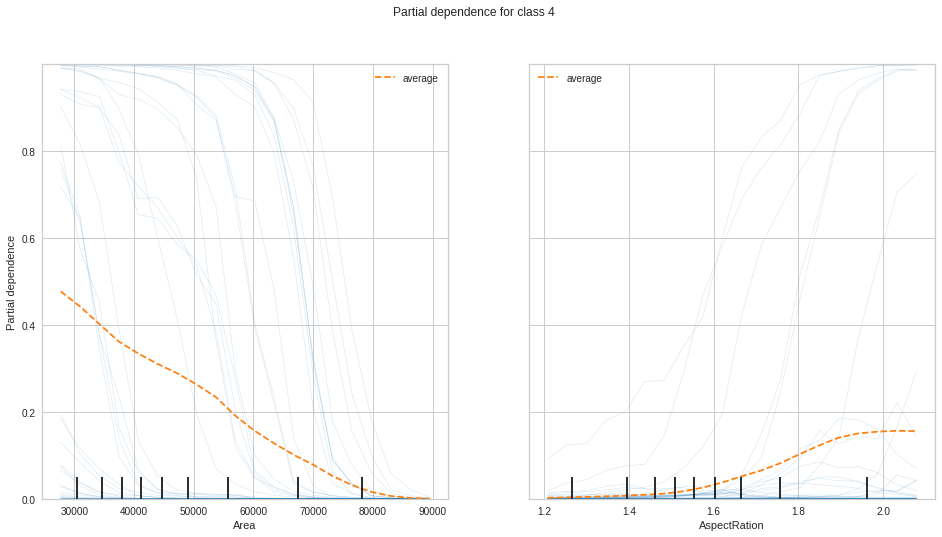

INFO:tensorflow:Assets written to: ram://3a240673-042c-4f03-bf3d-2622da029c9e/assets
INFO:tensorflow:Assets written to: ram://420f7f7b-5c96-40ca-89b5-b138181d23d0/assets
285/285 [==============================] - 1s 2ms/step


KeyboardInterrupt: 

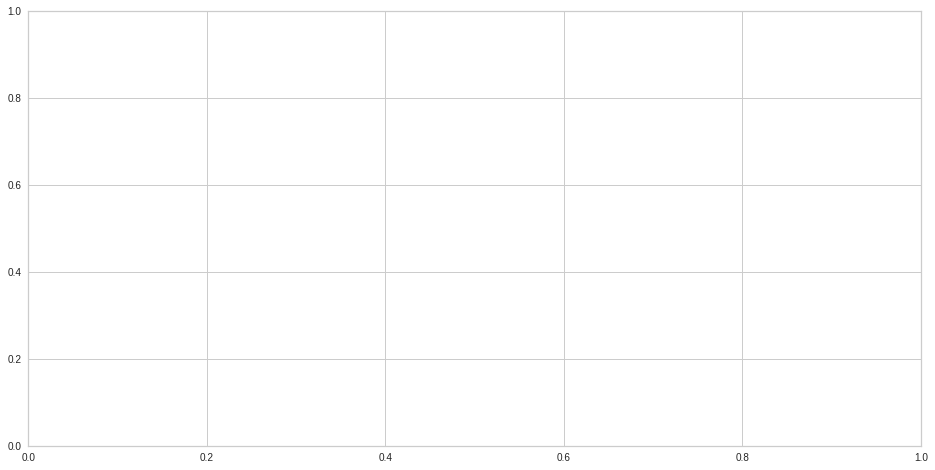

In [180]:
plot_partial_dependence(model, X_train, features_of_interest)

#### ROC/AUC

In [181]:
classes = y.unique()

141/141 [==============================] - 0s 2ms/step


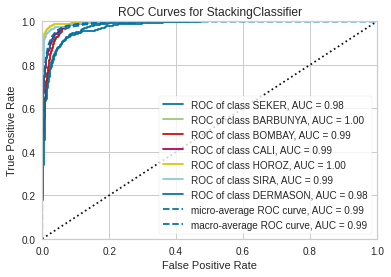

In [182]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Classification report

141/141 [==============================] - 0s 2ms/step


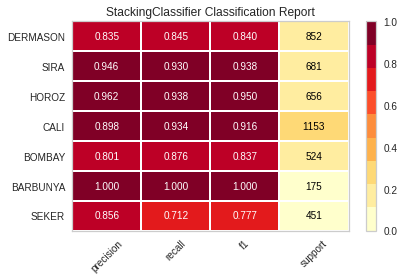

In [183]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Confusion matrix

141/141 [==============================] - 0s 2ms/step


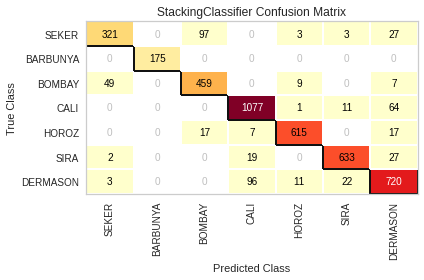

In [184]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Class prediction error

141/141 [==============================] - 0s 2ms/step


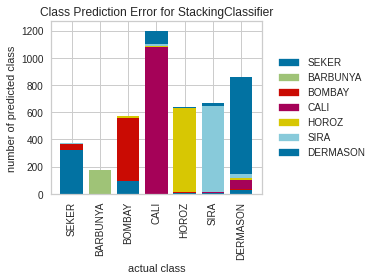

In [185]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

### Final Model

In [186]:
threshold_model = 5

In [187]:
threshold_score = 0.7

##### Filtered Level-0 models

In [188]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [189]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], n_jobs=-1)

##### Build final model

In [190]:
model = StackingClassifier(level_0_f, final_estimator=level_1)

### Final Model fitting

In [191]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

Epoch 1/2000
129/129 [==============================] - 2s 5ms/step - loss: 1.4176 - accuracy: 0.5002 - val_loss: 1.4194 - val_accuracy: 0.5954
Epoch 2/2000
129/129 [==============================] - 0s 4ms/step - loss: 0.8820 - accuracy: 0.6987 - val_loss: 0.9863 - val_accuracy: 0.8037
Epoch 3/2000
129/129 [==============================] - 0s 4ms/step - loss: 0.7393 - accuracy: 0.7496 - val_loss: 0.6182 - val_accuracy: 0.8684
Epoch 4/2000
129/129 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.7788 - val_loss: 0.4359 - val_accuracy: 0.8816
Epoch 5/2000
129/129 [==============================] - 0s 4ms/step - loss: 0.6248 - accuracy: 0.7924 - val_loss: 0.3727 - val_accuracy: 0.8871
Epoch 6/2000
129/129 [==============================] - 0s 4ms/step - loss: 0.5894 - accuracy: 0.8042 - val_loss: 0.3458 - val_accuracy: 0.8860
Epoch 7/2000
129/129 [==============================] - 0s 4ms/step - loss: 0.5663 - accuracy: 0.8156 - val_loss: 0.3397 - val_accuracy:

StackingClassifier(estimators=[('RFCG',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    SimpleImputer(add_indicator=True)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f73469b35b0>),
                                                                                                  ('pipeline-2...
                                                                                                                                  sparse=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f73469b3340>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('kerasclassifier',
                                                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f73469b02e0>)]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        n_jobs=-1,
                                                        penalty='elasticnet',
                                                        solver='saga'))

#### Final Model scoring

141/141 [==============================] - 0s 2ms/step


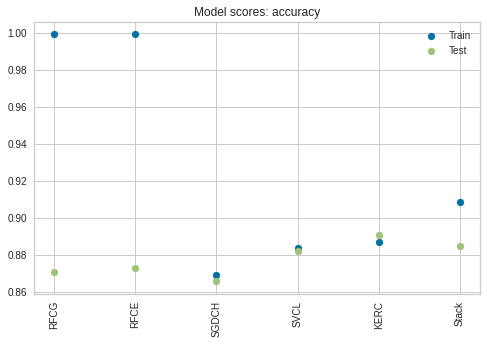

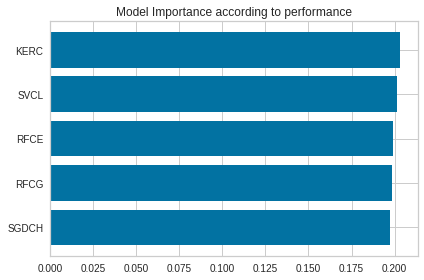

(array([['RFCG', 0.9992323719706108, 0.8708815672306323],
        ['RFCE', 0.9993420331176665, 0.8731077471059662],
        ['SGDCH', 0.8693935738567825, 0.8657613535173642],
        ['SVCL', 0.8837591841210659, 0.8820124666073018],
        ['KERC', 0.8870490185327339, 0.8906945681211041],
        ['Stack', 0.9087619256497423, 0.884906500445236]], dtype=object),
 array([['SGDCH', 0.19755155948389722],
        ['RFCG', 0.19871990246875956],
        ['RFCE', 0.1992278776795693],
        ['SVCL', 0.2012597785228081],
        ['KERC', 0.203240881844966]], dtype=object))

In [192]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

141/141 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: ram://750d089d-af6b-4277-b7cd-4baf5e92d8cb/assets
INFO:tensorflow:Assets written to: ram://a26d835d-388d-4b22-83d9-3e80362eb1a2/assets


2022-06-28 13:12:52.988438: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 13:12:52.988478: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


INFO:tensorflow:Assets written to: ram://82460125-433c-4c06-a577-541c00df0d3d/assets


2022-06-28 13:12:55.176341: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 13:12:55.176403: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-28 13:12:56.146668: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 13:12:56.146738: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 13:12:56.146774: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 13:12:56.147134: I tensorflow/core/platform/cpu_fe

INFO:tensorflow:Assets written to: ram://a5a51e41-e586-45a2-87de-5b51d0ea682d/assets


2022-06-28 13:12:58.546118: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 13:12:58.546333: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 13:12:58.546374: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 13:12:58.546767: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


141/141 [==============================] - 1s 3ms/step


2022-06-28 13:12:58.960209: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 13:12:58.960250: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


 54/141 [==========>...................] - ETA: 0s

2022-06-28 13:13:01.973877: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 13:13:01.973913: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-28 13:13:02.136217: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 13:13:02.136269: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 13:13:02.136302: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 13:13:02.136666: I tensorflow/core/platform/cpu_fe

 66/141 [=============>................] - ETA: 0s

2022-06-28 13:13:05.225709: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 13:13:05.225751: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 13:13:05.225784: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phbillet-x405ua): /proc/driver/nvidia/version does not exist
2022-06-28 13:13:05.226492: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


141/141 [==============================] - 0s 1ms/step


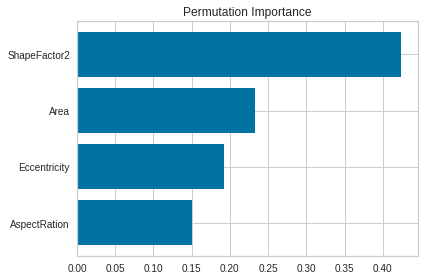

In [193]:
feature_importance = plot_perm_importance(model, X_test, y_test)

##### Final feature elimination

In [194]:
best_feature, worst_feature = feature_filtering(feature_importance, threshold_feature)

In [195]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [196]:
print(dropped_cols)

[]


#### Final ROC/AUC

141/141 [==============================] - 0s 2ms/step


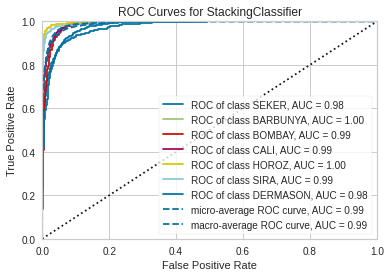

In [197]:
classes = y.unique() 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Final Classification report

141/141 [==============================] - 0s 2ms/step


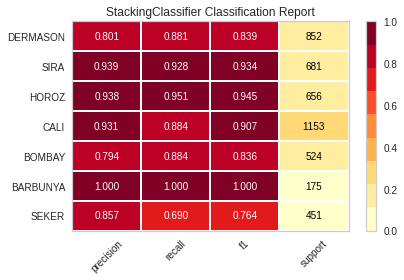

In [198]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Final Confusion matrix

141/141 [==============================] - 0s 2ms/step


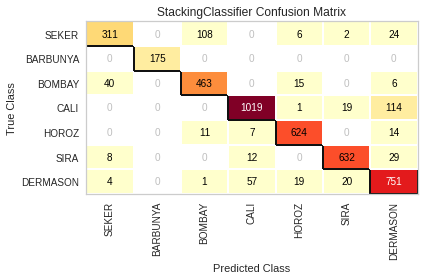

In [199]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Final Class prediction error

141/141 [==============================] - 0s 2ms/step


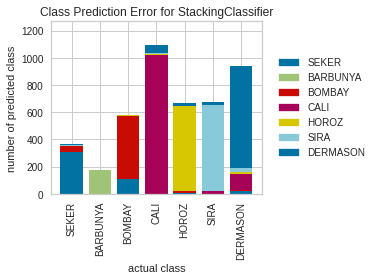

In [200]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

## Deployment

### Save your model

In [201]:
model_name = 'model.sav' 
dump(model, model_name)

INFO:tensorflow:Assets written to: ram://41cf66c9-cf91-4ff7-b11b-cbc64475866d/assets


['model.sav']

### Generate your server

In [202]:
fastapi_server(model, 'model.sav', X, y)

### [Test your API](./server.ipynb)